# Laboratorio 4 Parte 1

### Redes Neuronales Artificiales 
### Feed-Forward Networks - Perceptrón Multicapa (MLP)

### Universidad de Antioquia

### Facultad de Ingeniería

### Ingeniería de Sistemas

### Ude@ - 2018-I

#### Profesor: Antonio Tamayo Herrera
#### Nombre: David de Jesus Yepes Isaza
#### Cédula: 1020455542

#### Nombre: Rodrigo Antonio Porras Martinez
#### Cédula: 1039459720


## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

## Indicaciones

Este ejercicio tiene como objetivo implementar una red neuronal artificial bajo la arquitectura feed-forward network o perceptrón multicapa (MLP) para resolver un problema de clasificación multietiqueta o multiclase.

Para la implementación del modelo feed-forward network haremos uso de la librería neurolab. (Para instalarla use: pip install neurolab)

Para el problema de clasificación usaremos la siguiente base de datos: https://archive.ics.uci.edu/ml/datasets/Cardiotocography

#### Abstract: 
The dataset consists of measurements of fetal heart rate (FHR) and uterine contraction (UC) features on cardiotocograms classified by expert obstetricians.
	

#### Data Set Information:

2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified by three expert obstetricians and a consensus classification label assigned to each of them. Classification was both with respect to a morphologic pattern (A, B, C. ...) and to a fetal state (N, S, P). Therefore the dataset can be used either for 10-class or 3-class experiments.

#### Attribute Information:

LB - FHR baseline (beats per minute)

AC - # of accelerations per second

FM - # of fetal movements per second

UC - # of uterine contractions per second

DL - # of light decelerations per second

DS - # of severe decelerations per second

DP - # of prolongued decelerations per second

ASTV - percentage of time with abnormal short term variability

MSTV - mean value of short term variability

ALTV - percentage of time with abnormal long term variability

MLTV - mean value of long term variability

Width - width of FHR histogram

Min - minimum of FHR histogram

Max - Maximum of FHR histogram

Nmax - # of histogram peaks

Nzeros - # of histogram zeros

Mode - histogram mode

Mean - histogram mean

Median - histogram median

Variance - histogram variance

Tendency - histogram tendency

CLASS - FHR pattern class code (1 to 10)

NSP - fetal state class code (N=normal (1); S=suspect (2); P=pathologic (3))

En la siguiente celda de código se realiza la transformación de la variable de salida Y al formato One Hot Encoding. Además, se imprime la lista de listas que se debe pasar como parámetro al crear la red neuronal artificial. Esta lista de listas contine los valores máximos y mínimos para cada característica de la base de datos. (Notar que para las características de la 2 a la 6 todos los valores se multiplican por 1000 para evitar redondeos a 0 que causan problemas de indeterminación).

In [5]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
import time

def config_net_parameters(X):
    config = []
    for i in range(0,np.size(X,1)):
        maxXi = int(max(X[:,i]))
        minXi = int(min(X[:,i]))
        config.append([minXi,maxXi])
    
    #config = config[:-1] + "]"
    
    return config

def oneHotEncoder(y):
    
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = y.reshape(len(y), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    return onehot_encoded

#cargamos la bd de entrenamiento
db = np.loadtxt('DB_Fetal_Cardiotocograms.txt',delimiter='\t')  # Assuming tab-delimiter

X = db[:,0:22]

for i in range(1,7):
    X[:,i] = X[:,i]*1000

X = X
print ("Lista de listas con los máximos y mínimos de cada característica. La va a necesitar para crear el modelo.\n")
print (config_net_parameters(X))

Y = db[:,22]
Y = oneHotEncoder(Y)

#print(Y[:100])

Lista de listas con los máximos y mínimos de cada característica. La va a necesitar para crear el modelo.

[[106, 160], [0, 19], [0, 481], [0, 15], [0, 15], [0, 1], [0, 5], [12, 87], [0, 7], [0, 91], [0, 50], [3, 180], [50, 159], [122, 238], [0, 18], [0, 10], [60, 187], [73, 182], [77, 186], [0, 269], [-1, 1], [1, 10]]


## Ejercicio 1.

1.1. Por qué es necesario hacer la codificación One-Hot Encodign de la variable de salida?

R/: Dado que las variables de salida son de tipo discreto, N,S,P o estan etiquetadas numericamente de forma ascendente 1,2,3 hace que el modelo asuma que el valor 3 representa el mayor valor categorico, que la cateogria 3 es la mejor, haciendo que la prediccion del modelo tenga errores, es por ello que se hace necesario codificar de forma binaria con one-hot encoding.
    
1.2 De qué manera se toma la decisión para asignar la clase una muestra en la red feet-forward cuando hay múltiples clases?

R/: Con la función de activación SoftMax se estandarizan los valores en todas las neuronas de salida de tal forma que la suma total dé como resultado 1, luego se verifican los resultados de las neuronas y se le asigna a la muestra nueva la clase con mayor probabilidad.

## Ejercicio 2

En la siguiente celda, complete el código donde le sea indicado. Consulte la documentación oficial de neurolab para la arquitectura propuesta aquí: https://pythonhosted.org/neurolab/ex_newff.html

In [7]:
def classification_error(y_est, y_real):
    err = 0
    for y_e, y_r in zip(y_est, y_real):
        #Notar que y_est y y_real son matrices One-Hot Encoded (y_est tambien requiere un round para llevarla a binaria)
        #Por lo tanto se debe hacer la decodificación de estas matrices para comparar los valores predichos y los
        #Teóricos. Note que en una predicción correcta deben coindidir las posiciones de los arreglos que estén
        #activadas (bit 1 o hot :)!)
        pos_y_e = np.argmax(y_e)
        pos_y_r = np.argmax(y_r)
        if (pos_y_e) != pos_y_r:
            err += 1

    return err/np.size(y_est)

#Para calcular el costo computacional
tiempo_i = time.time()

#Complete el código para crear la red neuronal artificial. Use una única capa oculta (inicie con 10 neuronas) 
#y recuerde usar la función de activación SoftMax en la capa de salida. Para la capa oculta puede usar 
#TanSig o LogSig. También tiene la lista de listas generada en las instrucciones que debe pasar como 
#parámetro al método.

net = nl.net.newff(config_net_parameters(X),[10,3],[nl.trans.LogSig(),nl.trans.SoftMax()])


#Implemetamos la metodología de validación cross validation con 10 folds

Errores = np.ones(10)
j = 0
kf = KFold(n_splits=10)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]  

    #Complete el código
    # Entrenar el modelo
    err = net.train(X_train,y_train,epochs=100)

    #Complete el código aquí
    # Validación del modelo
    ypred = net.sim(X_test)

    Errores[j] = classification_error(ypred, y_test)
    j+=1

print("\nError de validación: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))

print ("\n\nTiempo total de ejecución: " + str(time.time()-tiempo_i) + " segundos.")

c:\users\highwind\appdata\local\programs\python\python36-32\lib\site-packages\neurolab\trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))



Error de validación: 0.051834381551362683 +/- 0.05920920157284526


Tiempo total de ejecución: 204.2127664089203 segundos.


2.1 Varíe el número de épocas del algoritmo de entrenamiento y el número de neuronas de la capa oculta y complete la siguiente tabla.

<table>
  <tr>
    <th># de Epocas</th>
    <th># Neuronas en capa oculta</th>
    <th>Error de validación</th>
    <th>Tiempo de ejecución</th>
  </tr>
  <tr>
    <td>10</td>
    <td>10</td>
    <td>0.04340213186878082 +/- 0.03624145975230172</td>
    <td>32.31690549850464</td>
  </tr>
  <tr>
    <td>10</td>
    <td>20</td>
    <td>0.03808057991555201 +/- 0.023234284310722143</td>
    <td>40.941643953323364</td>
  </tr>
  <tr>
    <td>10</td>
    <td>40</td>
    <td>0.04869858564384209 +/- 0.05835374949042994</td>
    <td>62.22649574279785</td>
  </tr>
  <tr>
    <td>100</td>
    <td>10</td>
    <td>0.012525467269022945 +/- 0.014201964552086652</td>
    <td>257.4686782360077</td>
  </tr>
  <tr>
    <td>100</td>
    <td>20</td>
    <td>0.05815690790444976 +/- 0.045197100799593784</td>
    <td>150.52042937278748</td>
  </tr>
  <tr>
    <td>100</td>
    <td>40</td>
    <td>0.04390114270528833 +/- 0.024566635387936225</td>
    <td>233.24404287338257</td>
  </tr><tr>
    <td>500</td>
    <td>10</td>
    <td>0.012521038178758081 +/- 0.016634623992607775</td>
    <td>263.5705199241638</td>
  </tr>
  <tr>
    <td>500</td>
    <td>20</td>
    <td>0.03789972539640358 +/- 0.03511191314934025</td>
    <td>183.61607718467712</td>
  </tr>
  <tr>
    <td>500</td>
    <td>40</td>
    <td>0.03789972539640358 +/- 0.03511191314934025</td>
    <td>183.61607718467712</td>
  </tr>
</table>


2.2 Analice e interprete los resultados de la tabla anterior. Cómo influye el cambio de los parámetros propuesto en el error y en el tiempo de ejecución? Explique.

R/: Cuando se aumenta las neuronas de la capa oculta aumenta el tiempo, esto es porque los son muchos mas pesos a calcular por cada posible entrada de las neuronas de salida. Por otra parte aumentar las neuronas no implica que se obtiene un error menor. Aumentar las neuronas aumenta el tiempo, pero aumentar las epocas lo hace mucho mas ya que implica las veces que se recorre la red neuronal, por eso el tiempo que aumenta tanto cuando se pasa de 10 epocas a 100 o 500. Con lo que concluimos que no necesariamente la cantidad de neuronas indica un mejor resultado, pero aplicar mas epocas si ayuda a disminuir el error pero con un mayor costo computacional.

## Ejercicio 3

Ahora va a resolver el problema de regresión de la base de datos AirQuality (https://archive.ics.uci.edu/ml/datasets/Air+Quality) usando RNA bajo la arquitectura feed-forward.

In [52]:
#cargamos la bd de entrenamiento

#cargamos la bd de entrenamiento
db = np.loadtxt('AirQuality.data',delimiter='\t')  # Assuming tab-delimiter
print ("Dim de la base de datos original: " + str(np.shape(db)))
db = db.reshape(9357,13)
DataBase = db
#La base d edatos AirQuality tiene muchos valores perdidos, vamos a quitar todos esos registros de la base de datos
#Están marcados como -200. Donde haya un valor -200 eliminaremos el registro.
j = 0
for i in range(0,np.size(db,0)):
    if -200 == db[i,12]:
        #print i
        j+=1
        DataBase = np.delete(DataBase,i,0)
    
print ("\nHay " + str(j) + " valores perdidos en la variable de salida. :(")

print ("\nDim de la base de datos sin las muestras con variable de salida perdido "+ str(np.shape(DataBase)))

#Ya hemos eliminado los registros con valor de la variable de salida perdido.

#Ahora vamos a imputar los valores perdidos en cada una de las características
print ("\nProcesando imputación de valores perdidos en las características . . .\n")

#data = open("AirQuality_cleaned.data", "w")

for k in range(0,np.size(DataBase,0)):
    for w in range(0,13):
        if -200 == DataBase[k,w]:
            DataBase[k,w] = round(np.mean(DataBase[:,w]))
        
    #data.write(str(DataBase[k,:]))

#data.close()
print ("Imputación finalizada.\n")

hay_missed_values = False
for i in range(0,np.size(DataBase,0)):
    if -200 in DataBase[i,:]:
        hay_missed_values = True
if(hay_missed_values):
    print ("Hay valores perdidos")
else:
    print ("No hay valores perdidos en la base de datos. Ahora se puede procesar. La base de datos está en la variable DataBase")

X = DataBase[:500,0:12]

print ("Lista de listas con los máximos y mínimos de cada característica. La va a necesitar para crear el modelo.\n")
print (config_net_parameters(X))

Y = DataBase[:500,12]*100 #(se multiplica por 100 para evitar errores en la interpretación de la eficiencia del modelo porque
                 # los valores de Y menores que 1 pueden llevar a malas interpretaciones).
Y = Y.reshape(np.size(X,0),1)
#print(X[:10])

Dim de la base de datos original: (9357, 13)

Hay 366 valores perdidos en la variable de salida. :(

Dim de la base de datos sin las muestras con variable de salida perdido (8991, 13)

Procesando imputación de valores perdidos en las características . . .

Imputación finalizada.

No hay valores perdidos en la base de datos. Ahora se puede procesar. La base de datos está en la variable DataBase
Lista de listas con los máximos y mínimos de cada característica. La va a necesitar para crear el modelo.

[[-35, 8], [818, 2040], [-159, 797], [0, 39], [457, 1754], [12, 478], [537, 1935], [20, 194], [1050, 2679], [341, 2359], [6, 29], [14, 83]]


In [63]:
#Error cuadrático medio (para problemas de regresión)
def ECM(Y_est,Y_real):
    N = np.size(Y_real)
    ecm = sum((Y_est - Y_real)**2)/N
    return ecm 

#Para calcular el costo computacional
tiempo_i = time.time()

#Complete el código para crear la red neuronal artificial. Use una única capa oculta (inicie con 10 neuronas) 
#y recuerde que debe usar la función identidad en la capa de salida, PureLin). Para la capa oculta
#puede usar TanSig o LogSig. También tiene la lista de listas generada en la celda anterior, la debe pasar como 
#parámetro al método.
net = nl.net.newff(config_net_parameters(X),[20,1],[nl.trans.PureLin(),nl.trans.PureLin()])

#Implemetamos la metodología de validación cross validation con 10 folds

Errores = np.ones(10)
j = 0
kf = KFold(n_splits=10)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]  

    #Complete el código
    # Entrenar el modelo
    err = net.train(X_train,y_train,epochs=100)

    #Complete el código aquí
    # Validación del modelo
    ypred = net.sim(X_test)

    Errores[j] = ECM(ypred, y_test)
    j+=1
    
print("\nError de validación: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))

print ("\n\nTiempo total de ejecución: " + str(time.time()-tiempo_i) + " segundos.")

Epoch: 100; Error: 2651.822587181736;
The maximum number of train epochs is reached
Epoch: 100; Error: 2757.76725283704;
The maximum number of train epochs is reached
Epoch: 100; Error: 2474.058427535696;
The maximum number of train epochs is reached
Epoch: 100; Error: 2145.2256332079546;
The maximum number of train epochs is reached
Epoch: 100; Error: 2646.62849227475;
The maximum number of train epochs is reached
Epoch: 100; Error: 2582.7053856155408;
The maximum number of train epochs is reached
Epoch: 100; Error: 2709.089503451324;
The maximum number of train epochs is reached
Epoch: 100; Error: 2592.9295147203493;
The maximum number of train epochs is reached
Epoch: 100; Error: 2739.2631327343242;
The maximum number of train epochs is reached
Epoch: 100; Error: 2787.3997771557297;
The maximum number of train epochs is reached

Error de validación: 15.740469856749712 +/- 10.028296150280648


Tiempo total de ejecución: 64.02020931243896 segundos.


3.1 Cómo se interpreta el número de épocas en el modelo?

R/: Las epoca consiste en pasar por la red neuronal todas las caracteristicas o training set (Una vez= 1 epoca), se realizan varias epocas para que los pesos cambien su valor y el error disminuya (algoritmo gradiente descendiente).

3.2 Por qué se usa la función de activación PureLin en lugar de TanSig o LogSig en la capa de salida para este problema?

R/: Como es un problema de regresion la salida es una variable continua, si se aplica una funcion como TanSing o LogSig se distorsiona la informacion y la prediccion seria erronea. La funcion PureLin es la funcion identidad que retorna lo mismo que recibe como parametro.



3.3 Varíe el número de épocas del algoritmo de entrenamiento y el número de neuronas de la capa oculta y complete la siguiente tabla.

<table>
  <tr>
    <th># de Epocas</th>
    <th># Neuronas en capa oculta</th>
    <th>Error de validación</th>
    <th>Tiempo de ejecución</th>
  </tr>
  <tr>
    <td>10</td>
    <td>10</td>
    <td>26.81629277601889 +/- 17.875670025838694</td>
    <td>5.70045018196106</td>
  </tr>
  <tr>
    <td>10</td>
    <td>20</td>
    <td>30.32221417497417 +/- 27.498098368073517</td>
    <td>6.555265426635742</td>
  </tr>
  <tr>
    <td>10</td>
    <td>40</td>
    <td>28.79480052183361 +/- 21.314847003756217</td>
    <td>10.085642576217651 </td>
  </tr>
  <tr>
    <td>100</td>
    <td>10</td>
    <td>15.744261974325974 +/- 10.065654656707576</td>
    <td>67.27732467651367</td>
  </tr>
  <tr>
    <td>100</td>
    <td>20</td>
    <td>15.67791276625687 +/- 9.995106196874543</td>
    <td>60.297651529312134</td>
  </tr>
  <tr>
    <td>100</td>
    <td>40</td>
    <td>15.735582549940247 +/- 10.021337763929147</td>
    <td>103.34480881690979</td>
  </tr><tr>
    <td>500</td>
    <td>10</td>
    <td>15.744261928155444 +/- 10.065654662765043</td>
    <td>67.36540389060974</td>
  </tr>
  <tr>
    <td>500</td>
    <td>20</td>
    <td>15.744261974908776 +/- 10.065654676718797</td>
    <td>96.89964628219604</td>
  </tr>
  <tr>
    <td>500</td>
    <td>40</td>
    <td>15.744261940427208 +/- 10.065654605531343</td>
    <td>201.66482377052307</td>
  </tr>
</table>


3.4 Para esta base de datos con casi 10 mil registros, que puede decir del costo computacional del modelo con 500 épocas y 40 neuronas en la capa oculta

R/: incrementa considerablemente, ya que la cantidad de registros es mucho mayor que deben pasar por la red neuronal es mucho mayor a la anterior base datos, pero en caracteristicas tiene menos, por lo que si suponemos que ambas DB tienen los mismos registros esta ultima tiene menos costo  computacional 

3.5 Haga una gráfica de las salidas reales vs las predicciones por la RNA, para evaluar visualmente el desempeño de la red. Esto solo para la configuración en la cuál se encontró el menor error.

(50, 1)


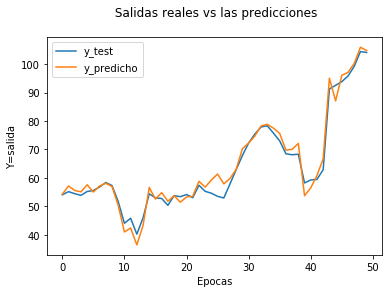

In [74]:
#print(np.shape(y_test))
plt.plot(np.arange(50),y_test,np.arange(50),ypred)
plt.ylabel('Y=salida')
plt.xlabel('Epocas')
plt.title(u' Salidas reales vs las predicciones\n')
plt.legend(['y_test', 'y_predicho'])
plt.show()